![image](https://github.com/anna-kryva/ML_KPI_labs/blob/master/lab-5/images/title.png?raw=true)

# Завдання до лабораторної роботи №5  

### Хід виконання роботи (варіант 5, КА-75):  
1. Взяти файл з даними у відповідності з варіантом.
2. Побудувати часті набори та асоціативні правила (АП), використовуючи алгоритм Apriori. Дослiдити множини АП залежно від параметрів побудови АП:  

    * мінімальної підтримки,  
    * мінімальної достовірності,  
    * максимальної потужності частих наборів.  

    Підібрати значення параметрів алгоритму Apriori, які призводять до значущих АП. АП *R_k* вважати значущим, якщо покращення (improvement або ліфт (lift)): *Improv(R_k)* > 1.  
3. Побудувати часті набори та множину АП, використовуючи алгоритм FP-росту. Дослідити множини АП залежно від параметрів побудови АП, які було наведено вище для Apriori.  
    Підібрати значення параметрів алгоритму FP-росту, які призводять до значущих АП.  
4. Зробити висновки щодо впливу параметрів алгоритмів Apriori та FP-росту на знайдені множини АП.  
5. Знайти значення прогнозу на основі побудованої множини правил.  
6. Порівняти результати, отримані алгоритмами Apriori та FP-росту.  


### Початкові дані:  
Файл: *Var_2_groceries - groceries*  
```
    The dataset contains 9835 transactions by customers shopping for groceries.  
    The data contains 169 unique items
```

## Опис алгоритмів  
Оскільки детальний опис алгоритмів приведено у презентації, для виконання лабораторної роботи потрібно чітко розуміти різницю між цими алгоритмами та як вони влпивають на оперативну пам'ять компьютера. Приведемо порівняння двох алгоритмів:  

| №  |      Apriori  |  FP-growth |
| :--: | :-------------: | :----------: |
| 1. | Алгоритм на основі масиву  | Алгоритм на основі дерева|
| 2. | Використовує операцію об'єднання для побудови АП | Створює умовні дерева шаблонів та базу умовних шаблонів із бази даних, які задовольняють мінімальну підтримку.|
| 3. | Використовє пошук у ширину | Використовє пошук у глибину |
| 4. | Використовує підхід, у якому він генерує шаблон на кожному рівні, що містять 1 елемент, потім 2 елементи, потім 3 елементи тощо. | Використовує підхід до зростання шаблону, що означає, що він враховує лише ті, які фактично існуюють в базі даних. |
| 5. | Генерація кандидатів відбувається надзвичайно повільно. Час виконання збільшується експоненціально залежно від кількості різних елементів. | Час виконання збільшується лінійно, залежно від кількості транзакцій та елементів |
| 6. | Генерація даних не залежить від інших вузлів | Дані взаємозалежні, кожному вузлу потрібен корінь |
| 7. | Це вимагає великого простору пам’яті через велику кількість генерації кандидатів. | Це вимагає менше місця в пам'яті через компактну структуру та відсутність генерації кандидатів. |
| 8. | Кілька разів сканує базу даних для генерування наборів кандидатів. | Лише двічі сканує базу даних для побудови дерева. |

## Хід роботи  

### 1. Взяти файл з даними у відповідності з варіантом.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Var_2_groceries - groceries.csv')
df

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Перед тим, як використовувати дані для алгоритму Apriori, потрібно їх привести до наступного виду:  
* заголовки стовпчиків - назва елементу (продукту)  
* заголовок рядків - номер транзакції  
* у клітинках позначення, чи є у данній транзакції елемент  

Для цього використаємо метод `TransactionEncoder` з бібліотеки `mlxtend`. Оскільки потрібно, щоб усі дані були строковими, найлегший спосіб - знову їх зчитати та трансформувати (датасет не є дуже великим, тому це можна зробити). Використаємо для цього наступну функцію.    

In [4]:
# !pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
import csv

def read_data(name):
    data = []
    with open(name, 'r') as file_r:
        reader = csv.reader(file_r)
        data = list(reader)
        for row in data:
            del row[0]
        data = data[1:][:]

    encoder = TransactionEncoder().fit(data)
    return pd.DataFrame(data=encoder.transform(data), columns=encoder.columns_)


Отримали наступну таблицю для використовування в алгоритмах.

In [5]:
products = read_data('Var_2_groceries - groceries.csv').drop(columns=[''])
products

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Покажемо, які продкти більш за все купують:

In [5]:
count = [products.iloc[:, i].value_counts().loc[True] \
         for i in range(len(products.columns))]
products_number = dict(zip(list(products.columns), count))
products_number_df = pd.DataFrame(products_number, index=['Count']).T

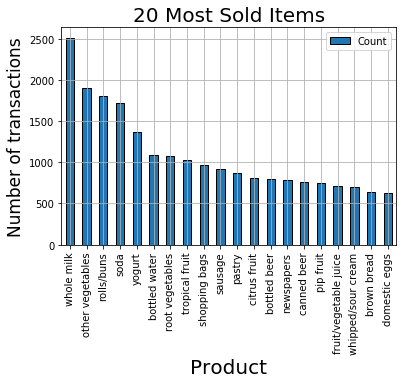

In [6]:
products_number_df.sort_values(by=['Count'], ascending=False).head(20) \
        .plot.bar(width=0.5, edgecolor='k', align='center', linewidth=1)
plt.xlabel('Product',fontsize=20)
plt.ylabel('Number of transactions',fontsize=17)
plt.title('20 Most Sold Items',fontsize=20)
plt.grid()
plt.ioff()

Отже, продукти, які найчастіше купують - це молоко та інші овочі. Проаналізуємо, чи зустрічаються вони в АП у наступних пунктах.

### 2. Побудувати часті набори та асоціативні правила (АП), використовуючи алгоритм Apriori.   
Дослідити множини АП залежно від параметрів побудови АП:  

   * мінімальної підтримки,  
   * мінімальної достовірності,  
   * максимальної потужності частих наборів.  

    Підібрати значення параметрів алгоритму Apriori, які призводять до значущих АП. АП *R_k* вважати значущим, якщо покращення (improvement або ліфт (lift)): *Improv(R_k)* > 1.  

Використаємо реалізацію алгоритма Apriori Себастьяна Рашки. Імортуємо з бібліотеки `mlxtend`.  
Ключові параметри алгоритму:  
* `min_support` - мінімальна підтримка,  
* `max_len` - максимальна потужність наборів.  

Для знаходження асоціативних правил використаємо метод `association_rules`.  
Ключові параметри методу:  
* `min_threshold` - мінімальний поріг для метрики  
* `metric` - метрика, для якої підбирається значення порогу. Може приймати значення `support, confidence, lift, leverage` (підтримка, достовірність, покращення, важель)

Щоб подивитися, як залежать між собою параметри `min_support`, `confidence` та `length`, будемо задавати різні значення для `min_support`. Додатково порахуємо довжину, а АП відсортуємо за параметром `confidence`. Адже останній параметр покаже, наскільки правило часто зустрічається, а отже є найбільш ймовірним. Для побудови асоціативних правил використаємо метрику `lift` з порогом 1, щоб відбирати тільки значущі правила.  
***Примітка:*** зменшити значення мінімальної підтримки та обмежити максимальну потужність не дозволяє оперативна пам'ять компьютера. Обчислення не завершуються, а програма "вилітає". Тому прослідкувати параметр максимальної потужності не виходить.

In [6]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

def build_rules(algorithm, min_supports):
    frequent_itemsets = []
    rules = []
    
    for min_support in min_supports:
        frequent_itemset = algorithm(products, min_support=min_support, use_colnames=True)
        frequent_itemset['length'] = frequent_itemset['itemsets'] \
                    .apply(lambda x: len(x))
        if frequent_itemset.shape[0] != 0:        
            rule = association_rules(frequent_itemset, metric="lift", min_threshold=1) \
                        .sort_values(by=["confidence"], ascending=False)
        else:
            rule = None
            
        frequent_itemsets.append(frequent_itemset)
        rules.append(rule)
        
    return frequent_itemsets, rules

In [7]:
def plot_support_length(frequent_itemsets):
    fig, axs = plt.subplots(2, len(frequent_itemsets)//2, figsize=(20, 8))
    fig.suptitle('Dependency support on length')
    for i in range(0, len(frequent_itemsets)//2):        
        axs[0, i].scatter(frequent_itemsets[i]['length'], frequent_itemsets[i]['support'])
        axs[1, i].scatter(frequent_itemsets[i+4]['length'], frequent_itemsets[i+4]['support'])
    for ax in axs.flat:
        ax.set(xlabel='length', ylabel='support') 

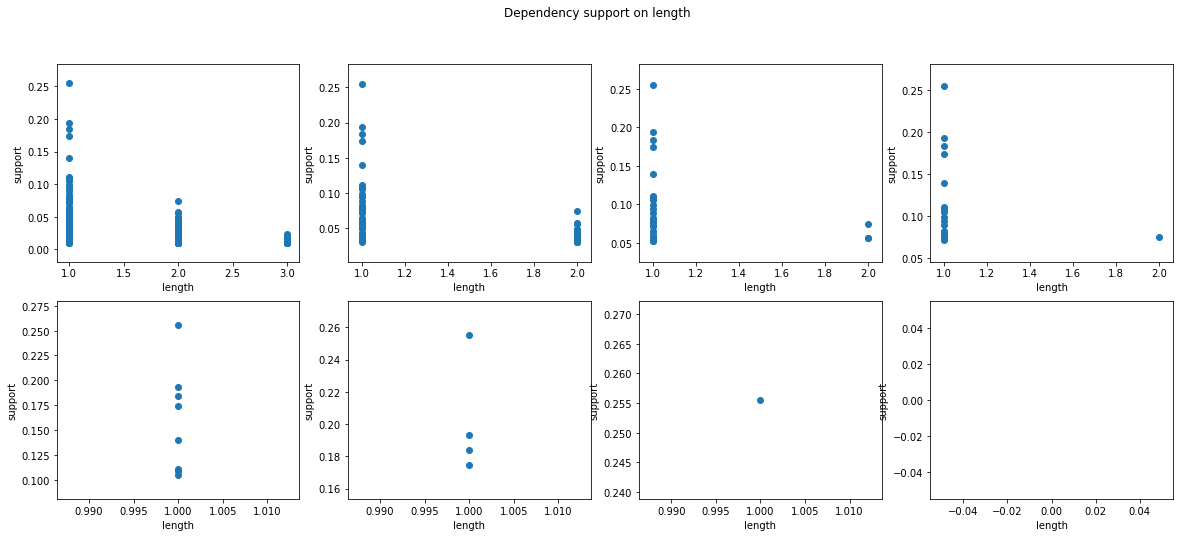

In [149]:
min_suports = [0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.3]

apriori_itemsets, apriori_rules = build_rules(apriori, min_suports)

plot_support_length(apriori_itemsets)

Як видно з графіків, при `min_support`=0.3 не має жодного елементу. Максимальна потужність - 3, при `min_support`=0.01. Таким чином, чим більше `min_support`, тим менша потужність або елементів зовсім немає.

За допомогою наступної функції виведемо дані АП для кожного `frequent_itemset` для першого запису, тобто максимальной достовірності для всих АП.

In [8]:
def df_with_max_conf(rules, min_supports):
    df = pd.DataFrame(columns=[*rules[0].columns, 'min_support'])
    for index, rule in enumerate(rules):
        if rule is not None:
            temp = rules[index].head(1).copy()
            temp['min_support'] = min_supports[index]
            df = df.append(temp)
            
    return df

In [139]:
apriori_final_rule = df_with_max_conf(apriori_rules, min_suports)
apriori_final_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,min_support
418,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.01
30,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735,0.03
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.05
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.07


Побудувати АП вийшло тільки для 4 випадків, коли `min_support` приймає значення 0.01, 0.03, 0.05, 0.07. Для більших значень АП побудувати неможливо.  
Найбільш значущим правилом є `(citrus fruit, root vegetables) => (other vegetables)`. `lift` для цього правила дорівнює `3.029608`, що є найбільшим з усіх інших значень. При цьому метрика `confidence` має такой найбільше значення, отже воно зустрічається найчастіше. Але при цьому це правило зустрічається досить рідко, тільки в 1% випадків, що досить мало. 

### 3. Побудувати часті набори та множину АП, використовуючи алгоритм FP-росту. Дослідити множини АП залежно від параметрів побудови АП, які було наведено вище для Apriori.
Підібрати значення параметрів алгоритму FP-росту, які призводять до значущих АП.  

Використаємо реалізацію алгоритма fpgrowth Себастьяна Рашки. Імортуємо з бібліотеки `mlxtend`.  
Ключові параметри алгоритму:  
* `min_support` - мінімальна підтримка,  
* `max_len` - максимальна потужність наборів.  

Повторимо аналогічні дії, як і для алгоритму Apriori. Оскільки даний алгоритм робить менше обчислювань, то добавимо значення 0.001 для мінімальної підтримки.

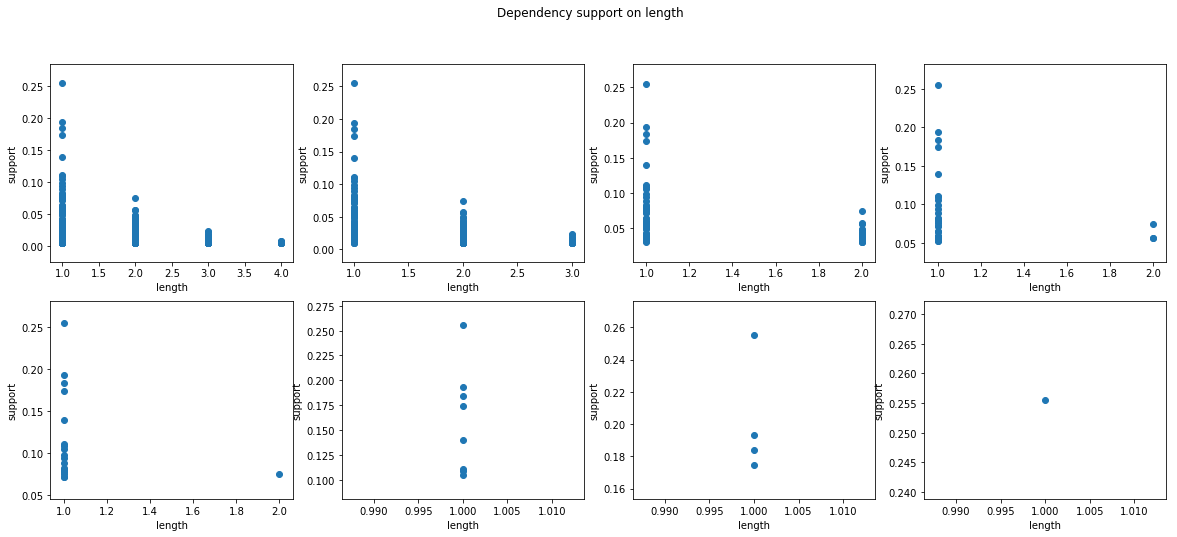

In [9]:
min_suports = [0.005, 0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2]

fpgrowth_itemsets, fpgrowth_rules = build_rules(fpgrowth, min_suports)

plot_support_length(fpgrowth_itemsets)

In [10]:
fpgrowth_final_rule = df_with_max_conf(fpgrowth_rules, min_suports)
fpgrowth_final_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,min_support
393,"(root vegetables, yogurt, tropical fruit)",(whole milk),0.008134,0.255516,0.005694,0.700000,2.739554,0.003616,2.481613,0.005
28,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.010
33,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735,0.030
1,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,0.050
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.070


Як і очікувалося, результати повністю ідентичні для однакових значень параметрів. За допомогою даного алгоритму зменшили мінімаьну підтримку, що дозволило знайти нове АП. Але це правило зустрічається менше 1% (0.5%). Це дуже мало, тому даний набір навряд чи може бути результатом прогнозу.

### 4. Зробити висновки щодо впливу параметрів алгоритмів Apriori та FP-росту на знайдені множини АП.  
Як видно з попередніх пунктів, параметр мінамальної підтримки впливає на кількість частих наборів. Чим більше цей параметр, тим менша кількість наборів для побудови АП. Потрібно шукати "золоту середину" для даного параметра. Якщо його взяти занадто маленьким, то буде занадто багато підрахунків, оперативна пам'ять на великому датасеті не зможе вмістити необхідні дані. Навіть на такому не великому датасеті при `min_support=0.001` оперативна пам'ять мого компьютера не змогла опрацювати інформацію. І це не є гарною стратегією, оскільки такі набори дуже рідко зустрічаються, а отже не можуть бути результатом прогнозу.   
Параметр максимальної потужності не використовувався для даного датасету, оскільки компьютер не змгі впоратися з таким навантаженням. Але були побудовані графіки, які показують залежність потужності від параметру мінімальної підтримки. Чим менший останній параметр, тим більша буде максимальна потужність.  
Достовірність показує, наскільки можна довіряти даному АП. Але окремо цей параметр аналізувати не дуже гарна ідея, оскільки він міг зусрічатися дуже рідко.  

### 5. Знайти значення прогнозу на основі побудованої множини правил.


Аналізуючи отриманий DataFrame у 3-му пункті, можна зробити висновок, що наступні АП є результатом прогнозу:  
* `(root vegetables, yogurt, tropical fruit) => (whole milk)` - дане правило найбільш правдиве, але воно дуже рідко зустрічається  
* `(root vegetables, citrus fruit) => (other vegetables)` - дане правило є найбільш значущим, але також зустрічається тільки у 1% транзакцій  
    Наступні правила є менш значущими, але зустрічаються частіше.  
* `(whipped/sour cream) => (whole milk)`  
* `(yogurt) => (whole milk)`  
* `(other vegetables) => (whole milk)`  

Оскільки датасет є не дуже великим, сказати, яке правило є найбільш значущим, важко, оскільки ймовірність зустрічі дуже маленька.  
В першому пункті було пораховано, що продукти, які найчастіше купують, - це цільне молоко та інші овочі. Вони зустрічаються у побудованих АП найчастіше.

### 6. Порівняти результати, отримані алгоритмами Apriori та FP-росту.  
Аналізуючи таблиці результатів у 2-му та 3-му пунктах, можна побачити, що результати співпадають. Це означає, що алгоритми працюють правильно. Адже результат вони повинні видавати однакові, різниця полягає у тому, як вони роблять обчислення. За допомогою алгоритму FP-росту вийшло порахвати часті набори при меншій мінімальні підтримці завдяки тому, що він дозволяє стиснути БД в компактну структуру для швидкого отримання частих наборів та зменшує число сканування БД. Оскільки датасет не є дуже великим для обчислення, різниця в часі роботи для однакових параметрів не є дуже помітної, але при зменшенні параметру мінімальної підтримки алгоритм FP-росту у декілька разів виграє.